# Students and Sections

[1. Introduction](#introduction)

[2. Preliminary data processing](#prelim)

[3. Summarizing the data](#sum)

[4. Standardizing the exam scores](#stand)

[5. The lead of Section 1 students in years 1 - 5 (a classical analysis)](#lead)

[6. A classical analysis for years 6 - 9](#6-9)

[7. Head to head of section 2 against section 3, all years except year 6](#head)

[8. Digression: Examining online vs onsite](#digr)

[9. A Bayesian approach](#bayes)

[10. Conclusions](#conc)


<a id='introduction'></a>
## 1. Introduction
We have data from exams for 9 years of 2nd year undergraduates taking a compulsory computational mathematics course. In every year except year 6, students were divided into 3 sections (formally named 1,2 and 3). In year 6 there were only 2 sections, due to an unusually small cohort. All sections were taught by the same teacher. During years 1 to 5, section 1 was academically selected using admission data (so streaming took place upon entry to the faculty, but academic performance while at the faculty did not affect it), while the other sections were randomized using the remaining students. As we will see, this policy was changed to pure randomization for all sections in year 6. 

The primary question we will investigate here is whether section numbering makes any noticeable difference to student performance (after accounting for academic selection of course). The motivation here is that student self-image is supposed to be associated with improved academic performance. During the period where academic selection was taking place for section 1, the policy of randomization for the other 2 sections was not well known. From personal experience, even some faculty members believed that sections 2 and 3 were also streamed (presumably in descending order). It seems likely that many students also shared this false belief. From here it seems at least plausible that section 3 students could have believed themselves to have been put in the 'bottom stream' based on ability, and that this false belief could affect their attainment in the course. 

Similarly, the end of the streaming policy was not well communicated (I only discovered it by seeing the change clearly manifested in this data!), so it seems likely that many students were not aware of the change. So again it seems at least plausible that section 1 students retained some residual pride in having been put in the 'top stream', and that this confidence could potentially improve their attainment. 

<a id='prelim'></a>
## 2. Preliminary data processing
We load the data into a dataframe. We create a new column with scores from 'Total' converted to floats. This creates some NAs due to some students leaving the course for various reasons.

In [1]:
data <- read.csv("students_anon.csv", header=TRUE, stringsAsFactors=FALSE)

num_years <- 9

df_base <- data.frame(data)
df_base$Score <- as.numeric(df_base$Total)
str(df_base)

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"


'data.frame':	1627 obs. of  5 variables:
 $ Section: int  1 2 1 1 1 1 1 1 1 2 ...
 $ Total  : chr  "97.78" "95.56" "95.56" "94.44" ...
 $ Year   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Repeat : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Score  : num  97.8 95.6 95.6 94.4 93.3 ...


For a first pass we will simply drop the NAs. This is crude, and it loses information as absent students are mostly those who have struggled with the class. Note that this is a compulsory class, so students who leave must retake it later to get their degree. This means students cannot drop it just because they would prefer to take a different subject. Fortunately, there are not many such students in the data, so dropping them altogether should be fairly safe (we will come back to this later).



In [2]:
df <- df_base[ complete.cases(df_base$Score) , ]
str(df)

'data.frame':	1613 obs. of  5 variables:
 $ Section: int  1 2 1 1 1 1 1 1 1 2 ...
 $ Total  : chr  "97.78" "95.56" "95.56" "94.44" ...
 $ Year   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Repeat : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Score  : num  97.8 95.6 95.6 94.4 93.3 ...


In addition, some students are taking the course for the 2nd (or 3rd) time. These students are assigned a section based only on their class schedule (as they usually also have the other courses for their current year to take). We choose to keep only the first instance of a student taking the course.

In [3]:
df <- df[!df$Repeat == 1,]
str(df)

'data.frame':	1571 obs. of  5 variables:
 $ Section: int  1 2 1 1 1 1 1 1 1 2 ...
 $ Total  : chr  "97.78" "95.56" "95.56" "94.44" ...
 $ Year   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Repeat : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Score  : num  97.8 95.6 95.6 94.4 93.3 ...


<a id='sum'></a>
## 3. Summarizing the data
Lets take a moment to summarize the data. Here we will simply look at the total remaining students and average scores for each section and each year. This is just to get a feel for the numbers.

In [4]:
library(dplyr)
d = df %>% group_by(Year) %>% summarise(total_students = length(Section), 
                                            total_S1 = sum(Section == 1),
                                            total_S2 = sum(Section == 2),
                                            total_S3 = sum(Section == 3),
                                            overall_average = mean(Score),
                                            mean_S1 = mean(Score[Section == 1]),
                                            mean_S2 = mean(Score[Section == 2]),
                                            mean_S3 = mean(Score[Section == 3]))

d


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




Year,total_students,total_S1,total_S2,total_S3,overall_average,mean_S1,mean_S2,mean_S3
<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,199,69,63,67,54.80714,66.34406,50.88190,46.61672
2,227,72,78,77,59.47577,72.43056,51.26923,55.67532
3,175,62,59,54,54.64000,68.12903,48.25424,46.12963
4,195,59,64,72,49.50872,57.20508,46.21094,46.13333
5,148,54,45,49,54.85811,65.37037,47.53333,50.00000
6,115,63,52,0,51.66957,49.58730,54.19231,NaN
7,175,64,56,55,47.64886,47.86812,47.14232,47.90945
8,162,49,52,61,49.02648,52.03265,51.21692,44.74443
9,175,57,57,61,44.49371,46.98018,44.43561,42.22459


Some things leap out. First, in years 1 - 5, section 1 has a clear lead in average score, with sections 2 and 3 ambiguously trading 2nd and 3rd places. Second, in year 6 there is no section 3. In this year due to a small total number, students were assigned to section 1 or 2 randomly. Finally, when the three section system returns in year 7, section 1 has lost most if its lead in average score, though a potentially interesting small lead remains.

I emailed my faculty administration about this. Apparently the current policy is that all sections are purely randomized. The person I communicated with was not sure exactly when the switch took place, but unless something weird is going on in the background to create a false impression, we can clearly see from the data that it took place in year 6.

We can also plot this.

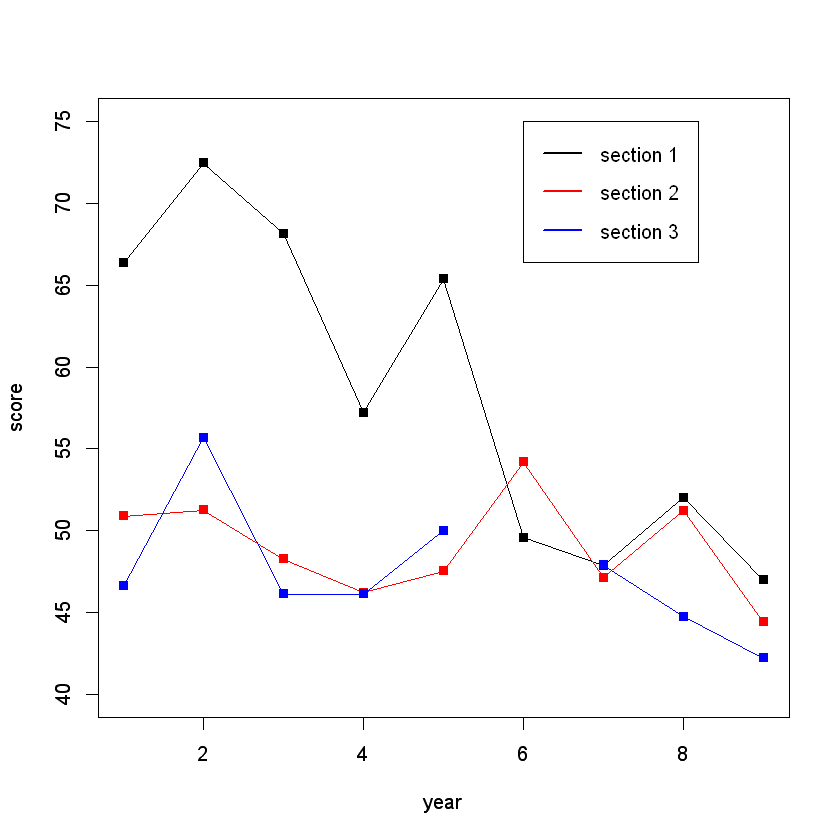

In [5]:
sections = list(d$mean_S1, d$mean_S2, d$mean_S3)
colours = c('black', 'red', 'blue')
i = 1
for (section in sections)
{
    plot(d$Year, section, ylim=c(40,75), ylab = "score", xlab = 'year', pch = 15, col = colours[i])
    lines(d$Year, section, ylim=c(40,75), ylab = "", col = colours[i])
    par(new = TRUE)
    i = i + 1
}
legend(6,75,c("section 1","section 2", "section 3"), lwd=c(2,2,2), col=c("black","red", "blue"), y.intersp=1.5)

### The top and bottom 10 students each year, by section
It's also interesting to see how the make up of the top and bottom ten students has changed over the years

In [6]:
rank <- seq (1,10,1)
top_students <- data.frame(Rank = rank)

bot_rank <- seq(-1,-10,-1)
bot_students <- data.frame(Rank = bot_rank)

for (i in 1:num_years){
    index <- df$Year == i
    
    d_t <- df[index,]
    sorted <- d_t[order(d_t$Score, decreasing = TRUE), ]
    top_ten <- c(sorted$Section[1:10])
    top_students <- cbind(top_students, top_ten)
    
    d_b <- df[index,]
    sorted_bot <- d_b[order(d_b$Score, decreasing = FALSE), ]
    bot_ten <- c(sorted_bot$Section[1:10])
    bot_students <- cbind(bot_students, bot_ten)
}

col_names = c('Rank','Year 1', 'Year 2','Year 3', 'Year 4', 'Year 5', 'Year 6', 'Year 7', 'Year 8', 'Year 9')
colnames(top_students) <- col_names
colnames(bot_students) <- col_names
top_students
bot_students

Rank,Year 1,Year 2,Year 3,Year 4,Year 5,Year 6,Year 7,Year 8,Year 9
<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,1,1,1,1,1,3,2,1
2,2,1,1,1,1,2,3,3,2
3,1,1,1,1,1,2,1,2,3
4,1,1,1,3,1,2,3,3,1
5,1,1,1,1,3,2,1,1,1
6,1,1,1,1,1,1,3,2,2
7,1,2,1,3,3,2,2,3,1
8,1,1,1,1,1,1,2,1,1
9,1,1,1,1,1,1,1,2,1


Rank,Year 1,Year 2,Year 3,Year 4,Year 5,Year 6,Year 7,Year 8,Year 9
<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
-1,3,2,3,2,3,1,1,2,3
-2,1,2,3,3,1,2,1,3,2
-3,1,3,3,2,3,2,3,3,1
-4,3,2,3,1,1,1,1,2,3
-5,3,2,2,3,2,2,2,1,1
-6,3,3,2,2,3,2,1,2,3
-7,2,2,2,3,3,1,3,3,3
-8,3,3,2,3,3,1,2,3,1
-9,3,2,3,1,2,1,1,2,1


Just by eye we see the proportion of section 1 students in the top 10 dropping, and similarly increasing for the bottom 10. 

<a id='stand'></a>

## 4. Standardizing the exam scores
We will first drop some now redundant columns from the table to reduce clutter.

In [7]:
drops <- c("Total","Repeat")
df <- df[ , !(names(df) %in% drops)]
str(df)

'data.frame':	1571 obs. of  3 variables:
 $ Section: int  1 2 1 1 1 1 1 1 1 2 ...
 $ Year   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Score  : num  97.8 95.6 95.6 94.4 93.3 ...


We calculate standardized scores based on year (to account for variations in the difficulty of the exams and so on).

In [8]:
for (y in 1 : num_years){
  index <- df$Year == y
  m <- mean(df$Score[index])
  s <- sd(df$Score[index])
  df$Score_std[index] <- ( df$Score[index] - m )/s
    }

str(df)

'data.frame':	1571 obs. of  4 variables:
 $ Section  : int  1 2 1 1 1 1 1 1 1 2 ...
 $ Year     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Score    : num  97.8 95.6 95.6 94.4 93.3 ...
 $ Score_std: num  2.07 1.96 1.96 1.91 1.86 ...


<a id='lead'></a>

## 5. The lead of Section 1 students in years 1 - 5 (a classical analysis).

Here we will examine the lead of section 1 students during the years where they are academically selected. This is significant enough to be obvious without any statistical tests, but we will perform a t-test and run ANOVA, partly as a kind of sanity check, and also to to help calibrate our expectations for plausible effect sizes. 

In [9]:
index <- df$Year == 6 | df$Year == 7 | df$Year == 8 | df$Year == 9

df_trimmed <- df[!index,]

str(df_trimmed)

'data.frame':	944 obs. of  4 variables:
 $ Section  : int  1 2 1 1 1 1 1 1 1 2 ...
 $ Year     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Score    : num  97.8 95.6 95.6 94.4 93.3 ...
 $ Score_std: num  2.07 1.96 1.96 1.91 1.86 ...


First some simple box plots.

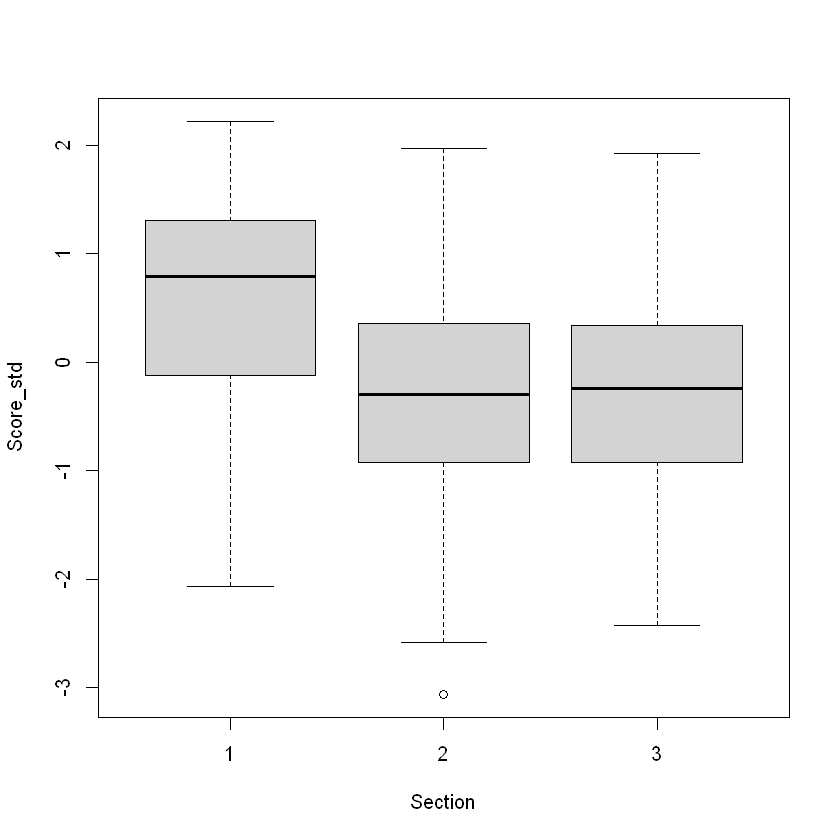

In [10]:
boxplot(Score_std ~ Section,
  data = df_trimmed
)

Now some histograms.

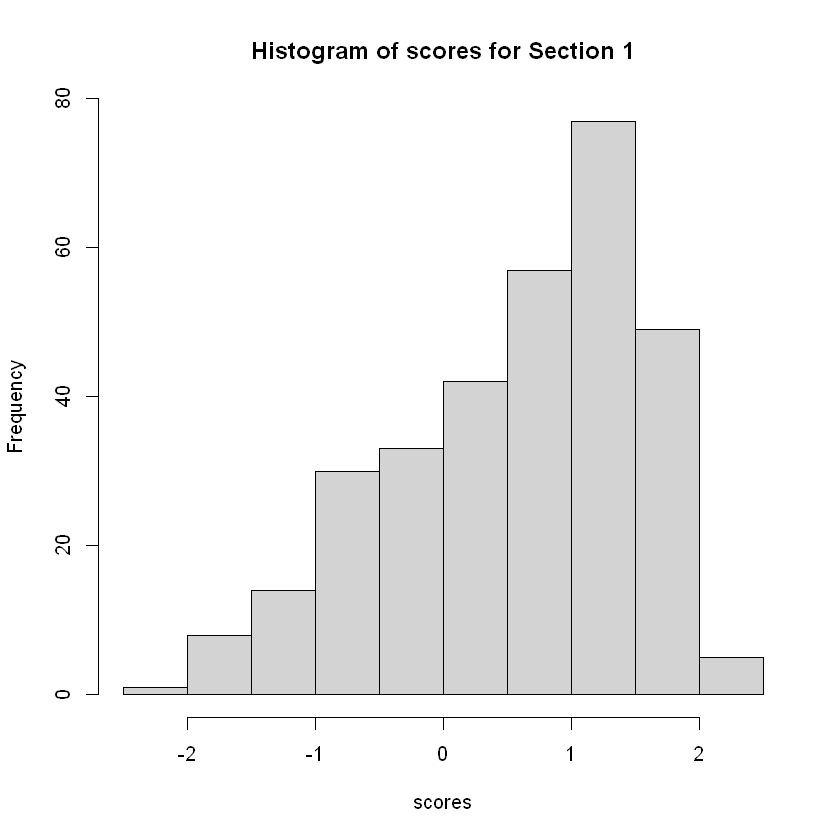

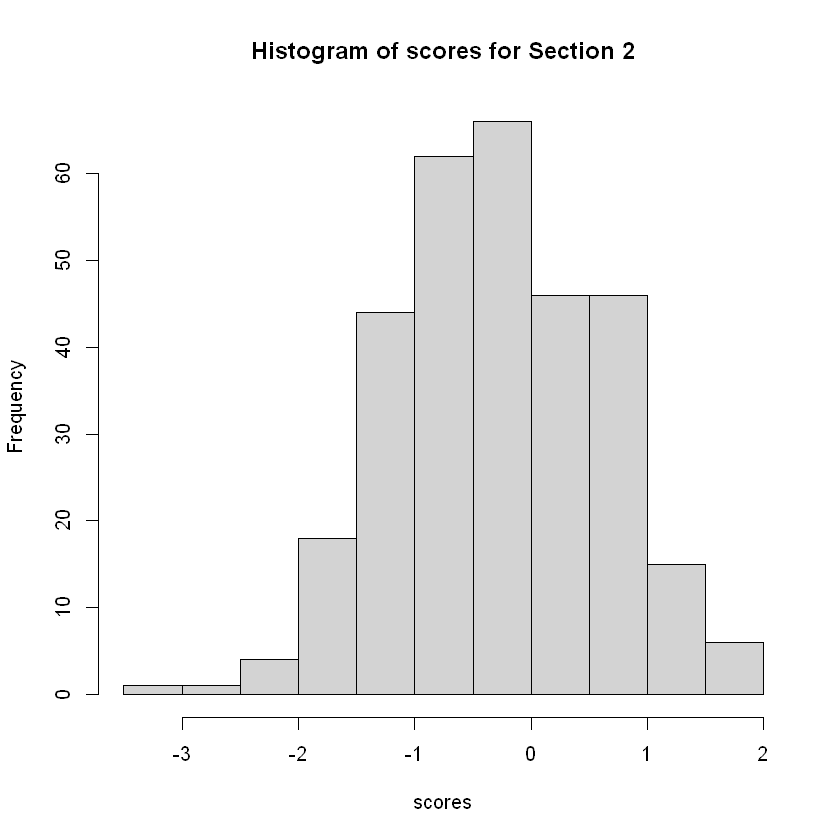

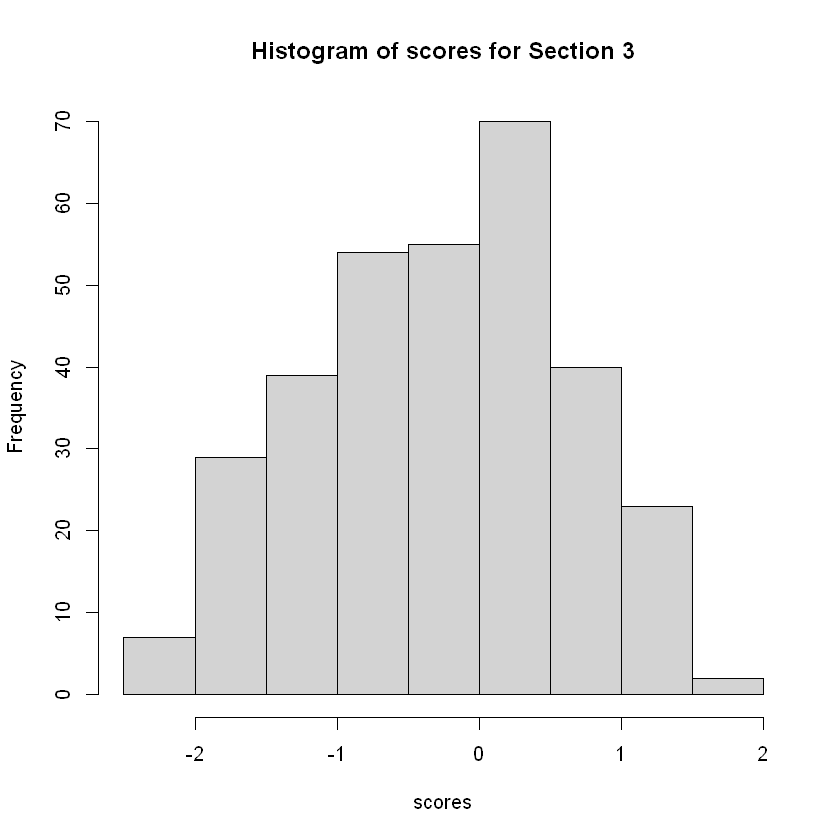

In [11]:
for (i in 1:3){ 
    index = df_trimmed$Section == i
    scores = df_trimmed$Score_std[index]
    hist(scores, main = paste("Histogram of scores for Section", i))
    }

### Examining the normality assumptions
The histogram for section 1 looks quite skewed. We will analyze our data with a t-test and then ANOVA. Both these tests assume the underlying populations are normal, but fortunately are generally considered to be quite robust against violation of this assumption.

We can perform Shapiro-Wilk test to test the compatibility of our data with the normality assumption. However, this test is known to be extremely sensitive with reasonably large sample sizes like ours, so the fact that we can see a clear departure from normality for section 1 just by looking at it means our test is certain to come back positive in this case.

In [12]:
for (i in 1:3){ 
    index <- df_trimmed$Section == i
    scores <- df_trimmed$Score_std[index]
    print(paste("Section", i, "  p =", shapiro.test(scores))[2])
    }


[1] "Section 1   p = 5.69000381322183e-09"
[1] "Section 2   p = 0.597456875996041"
[1] "Section 3   p = 0.0124653951434874"


Sure enough, our test indicates departure from normality for section 1 with extremely high confidence. It is also quite confident that the data for section 3 is incompatibility with a normality assumption. 

More useful information can be gained from the corresponding Q-Q plots. Again we see the strong left skew for section 1.

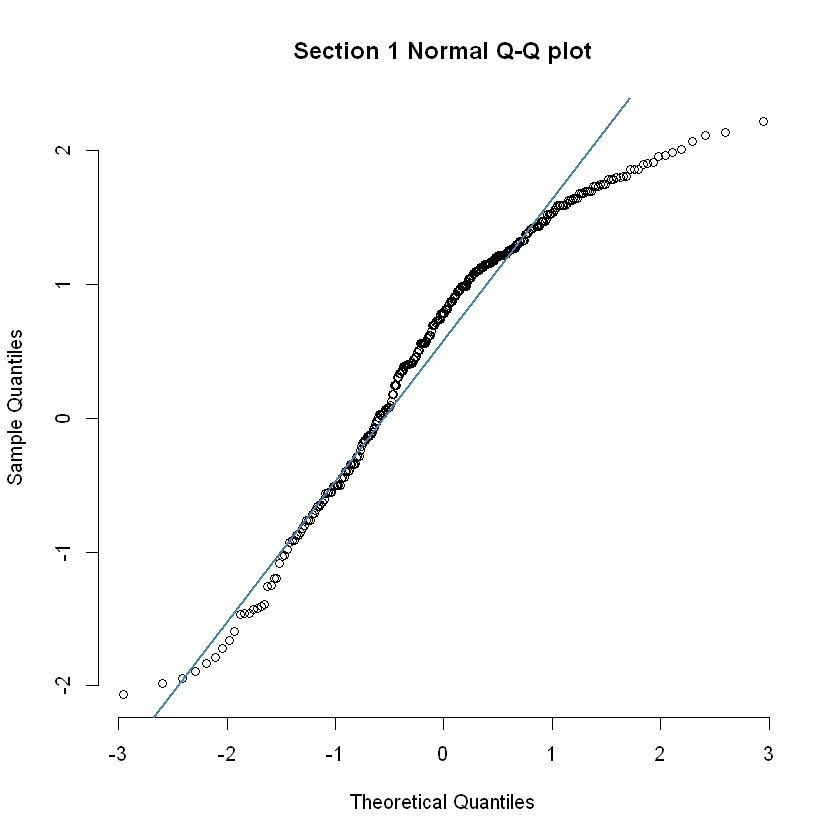

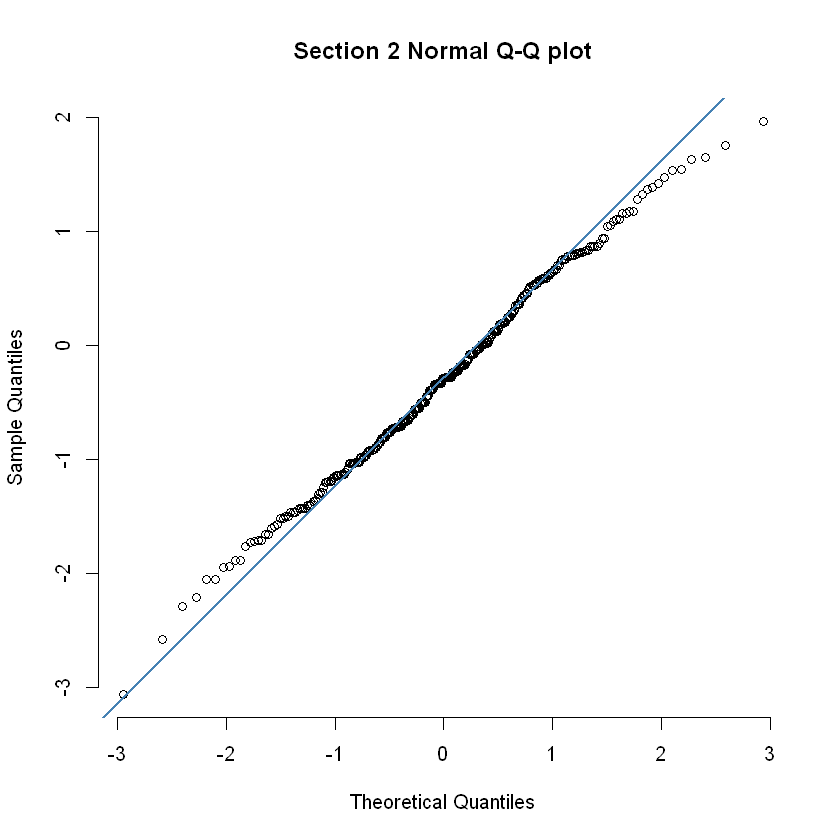

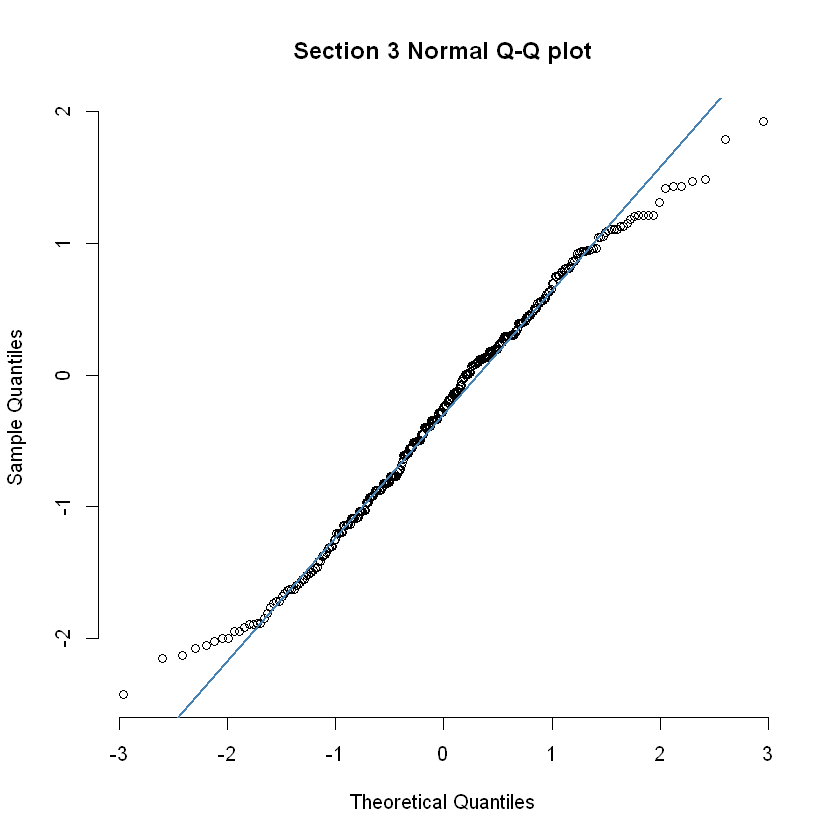

In [13]:
for (i in 1:3){ 
    index <- df_trimmed$Section == i
    scores <- df_trimmed$Score_std[index]
    text <- paste("Section", i, "Normal Q-Q plot")
    qqnorm(scores, main = text, pch = 1, frame = FALSE)
    qqline(scores, col = "steelblue", lwd = 2)
    }



Having established that our data for section 1 almost certainly does not follow a normal distribution, and that the section 3 data has a statistically significant deviation from normality too (according to the sensitive Shapiro-Wilk test), the question is how to proceed. 

As mentioned above, we intend to perform a t-test and also run ANOVA. Both these tests make theoretical normality assumptions. There is some debate about how sensitive these tests are to violation of the normality assumption (see e.g. the discussion [here](https://stats.stackexchange.com/questions/38967/how-robust-is-the-independent-samples-t-test-when-the-distributions-of-the-sampl)). However, I think the main problem for us would be reduced power, but, as we will see shortly, the distinction between section 1 and the others is easily picked up anyway.

Note that there are non-parametric tests we could theoretically use here too. For example, the Kruskal-Wallis test is an analog of ANOVA that can be used when the underlying distributions are not normal. Unfortunately, this test makes the assumption that the different groups have the same (not necessarily normal) distribution, and our analysis above reveals the distribution of section 1 scores is most likely different from that of the others.



### The t-test for years 1 - 5
For our t-test we will test the hypothesis that the standardized scores of section 1 students are on average higher than those of students from the other sections (which we will pool together). So $H_A$ is that $\mu_1 - \mu_{23} >0$, and $H_0$ is that $\mu_1 = \mu_{23}$.  

We will use a standard t-test, assuming equal population variances (we will examine this assumption later, though it does not make a difference to the conclusion in this case, as can be seen by setting var.equal to FALSE).

In [14]:
index <- df_trimmed$Section == 1
scores_1 <- df_trimmed$Score_std[index] 

index <- df_trimmed$Section == 2 | df_trimmed$Section == 3
scores_23 <- df_trimmed$Score_std[index]

str(scores_1)
str(scores_23)

 num [1:316] 2.07 1.96 1.91 1.86 1.86 ...
 num [1:628] 1.96 1.75 1.54 1.48 1.32 ...


Now for the actual test. We see high confidence that the null hypothesis is false, which is what we would expect given that we know that academic selection took place.

In [15]:
t.test(x = scores_1, y = scores_23,
       alternative = "greater", paired = FALSE, var.equal = TRUE,
       conf.level = 0.95)


	Two Sample t-test

data:  scores_1 and scores_23
t = 13.702, df = 942, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.7580229       Inf
sample estimates:
 mean of x  mean of y 
 0.5731509 -0.2884008 


The test above provides extremely strong evidence of a difference (on average) between section 1 students and students from other sections. Note that this difference does not necessarily hold for individual students. Every year there are students from sections 2 and 3 placing close to the top of the exam scores, and also students from section 1 placing close to the bottom.

We will now calculate the effect size using Cohen's d. To avoid installing extra packages we will work through the simple calculation ourselves.

In [16]:
n_1 = length(scores_1) 
n_23 = length(scores_23)

paste("n_1:", n_1, sep = " ")
paste("n_23:", n_23, sep = " ")

m_1 = mean(scores_1)
m_23 = mean(scores_23)

var_1 = var(scores_1)
var_23 = var(scores_23)

paste("var_1:", var_1, sep = " ")
paste("var_23:", var_23, sep = " ")

pooled_var = ((n_1 - 1)*var_1 + (n_23 - 1)*var_23 )/(n_1 + n_23 -2)
paste("pooled_var:", pooled_var, sep = " ")

effect_size = ( m_1 - m_23 )/( sqrt(pooled_var))
paste("Effect size:", effect_size, sep=" ")

[1] "n_1: 316"

[1] "n_23: 628"

[1] "var_1: 0.931072307015554"

[1] "var_23: 0.780975578517804"

[1] "pooled_var: 0.831167159703357"

[1] "Effect size: 0.945011649734578"

This effect size is quite large, so selection procedures seem to be reasonably effective at identifying the most academically able students (on average - again, while the effect is clear in the aggregate data, as we have seen, there are many individual exceptions to the rule).

To better understand the significance of the calculated effect size, we will translate its value back into exam scores.

In [17]:
s = sd(df_trimmed$Score)
paste("Length of one SD:", s, sep = " ")
paste("Effect size on outcome scale:", s * effect_size, sep = " ")

[1] "Length of one SD: 20.1540722057538"

[1] "Effect size on outcome scale: 19.0458330240292"

So, students from section 1 score (roughly) on average 19 points higher in their exam. This is significant, representing more than a whole letter grade.

To close out this initial analysis we will test the assumption of equal variances. From above we see that $s_1$ is a little higher than $s_{23}$. Since $s_1$ and $s_{23}$ follow $\chi^2$ distributions with 315 and 627 degrees of freedom respectively, the ratio $\frac{s_1}{s_{23}}$ follows an $F$ distribution with $(315, 627)$ d.o.f.

$H_A$ here is that $\sigma_1\neq\sigma_{23}$ too. From the output of the cell below we see the associated $p$-value is 0.068. This would not usually be considered enough to reject the null hypothesis of equal variances, though of course the classical 0.05 cutoff for significance is quite arbitrary. Note also that we have not done a power analysis of this test, so it is not clear to what extent this constitutes evidence *for* the null hypothesis. 

In [18]:
var.test(scores_1, scores_23, alternative = 'two.sided')


	F test to compare two variances

data:  scores_1 and scores_23
F = 1.1922, num df = 315, denom df = 627, p-value = 0.06781
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.9872515 1.4485785
sample estimates:
ratio of variances 
          1.192191 


### ANOVA for years 1 - 5

We can also compare all sections simultaneously with ANOVA using section as a factor with 3 levels.

In [19]:
aov_results <- aov(Score_std ~ factor(Section), # need 'factor' here to tell aov that Section is categorical
  data = df_trimmed
)

summary(aov_results)

                 Df Sum Sq Mean Sq F value Pr(>F)    
factor(Section)   2  156.1   78.04    93.8 <2e-16 ***
Residuals       941  782.9    0.83                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

This test confirms what we already knew: that at least one of the population means is different from the others. We know this is section 1, but we can also get this result using a post hoc Tukey test. Note that for the classical Tukey test the sample sizes should be equal, though in the case of unequal sample sizes the reported p-values are apparently higher than they should be (so rejection of $H_0$ using them is conservative, i.e. we would have also rejected had we accounted for unequal sample sizes). I have read that R's TukeyHSD function uses the Tukey-Kramer method that corrects for this anyway, but I have not verified this. 

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Score_std ~ factor(Section), data = df_trimmed)

$`factor(Section)`
           diff        lwr        upr     p adj
2-1 -0.86926394 -1.0405702 -0.6979577 0.0000000
3-1 -0.85408125 -1.0240245 -0.6841380 0.0000000
3-2  0.01518268 -0.1557248  0.1860902 0.9763124


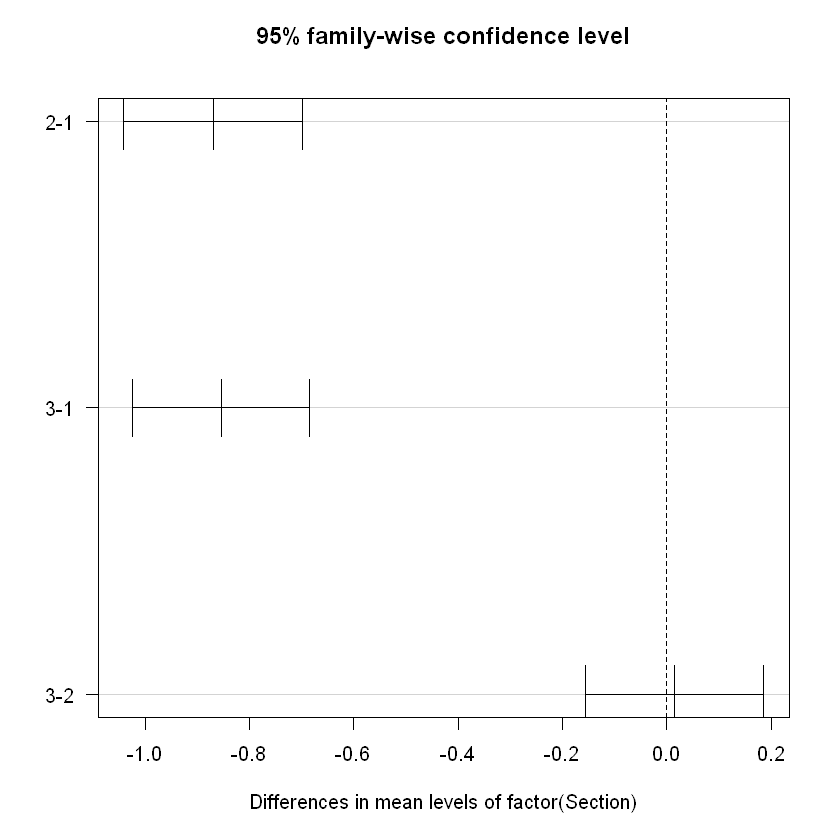

In [20]:
TukeyHSD(aov_results, conf.level=.95)

plot(TukeyHSD(aov_results, conf.level=.95), las = 1)

<a id='6-9'></a>

## 6. A classical analysis for years 6 - 9
Here we will perform a similar classical analysis of the years 6 to 9, where all sections were randomized.

In [21]:
index <- df$Year == 6 | df$Year == 7 | df$Year == 8 | df$Year == 9

df_trimmed2 <- df[index,]

str(df_trimmed2)

'data.frame':	627 obs. of  4 variables:
 $ Section  : int  1 2 2 2 2 1 2 1 1 1 ...
 $ Year     : int  6 6 6 6 6 6 6 6 6 6 ...
 $ Score    : num  96 93 92 92 91 90 90 89 88 87 ...
 $ Score_std: num  1.77 1.65 1.61 1.61 1.57 ...


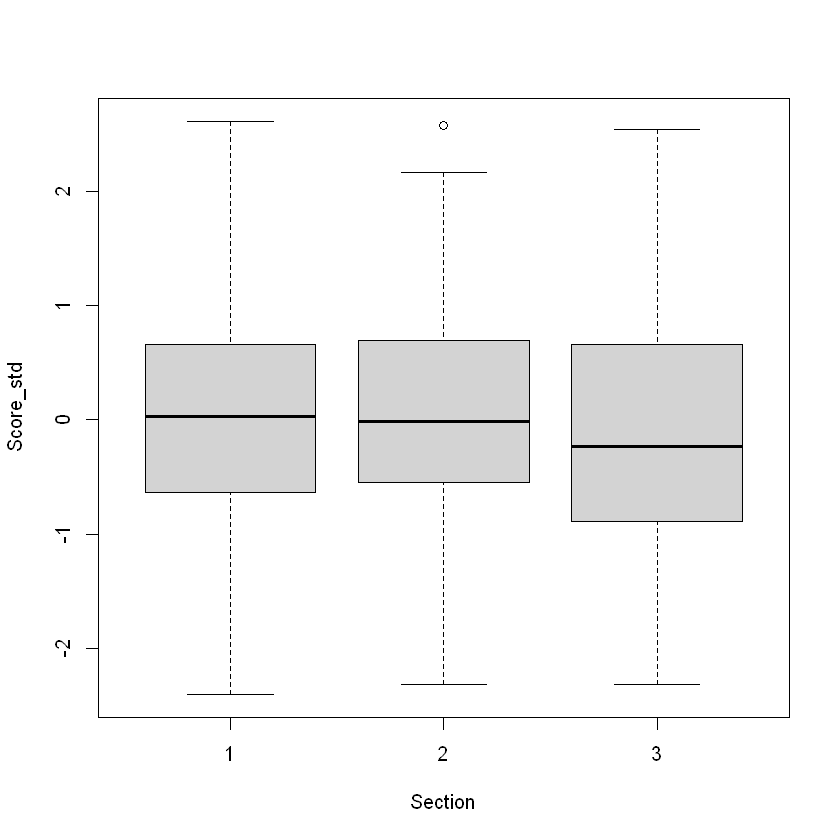

In [22]:
boxplot(Score_std ~ Section,
  data = df_trimmed2
)

In this case, running Shapiro-Wilk and looking at the Q-Q plots reveals no significant departure from normality.

[1] "Section 1   p = 0.737781068412014"
[1] "Section 2   p = 0.493404026759293"
[1] "Section 3   p = 0.216299962216237"


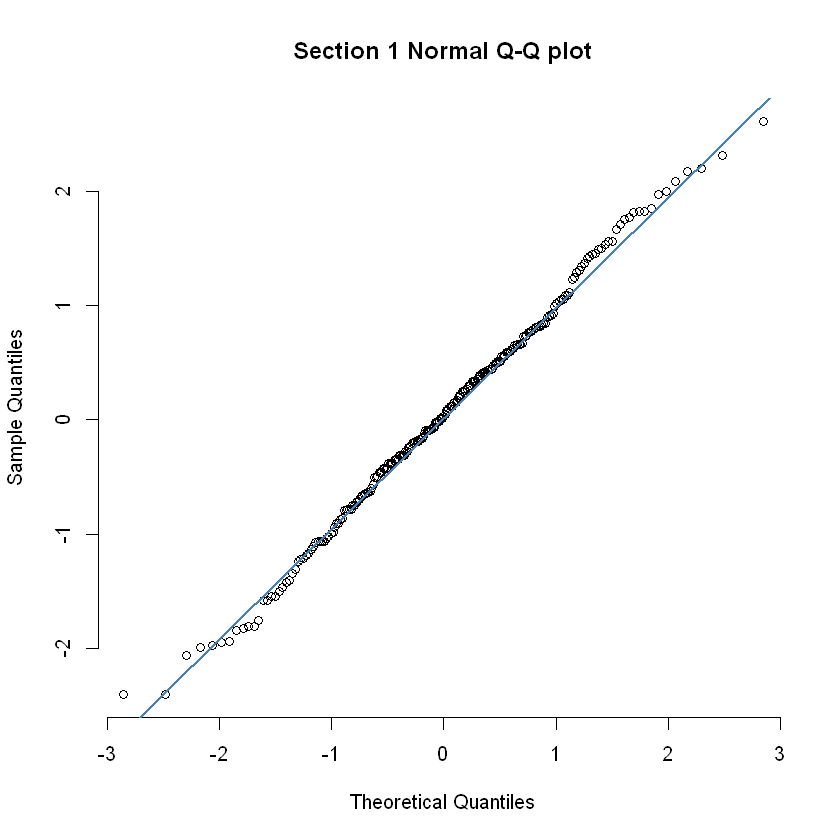

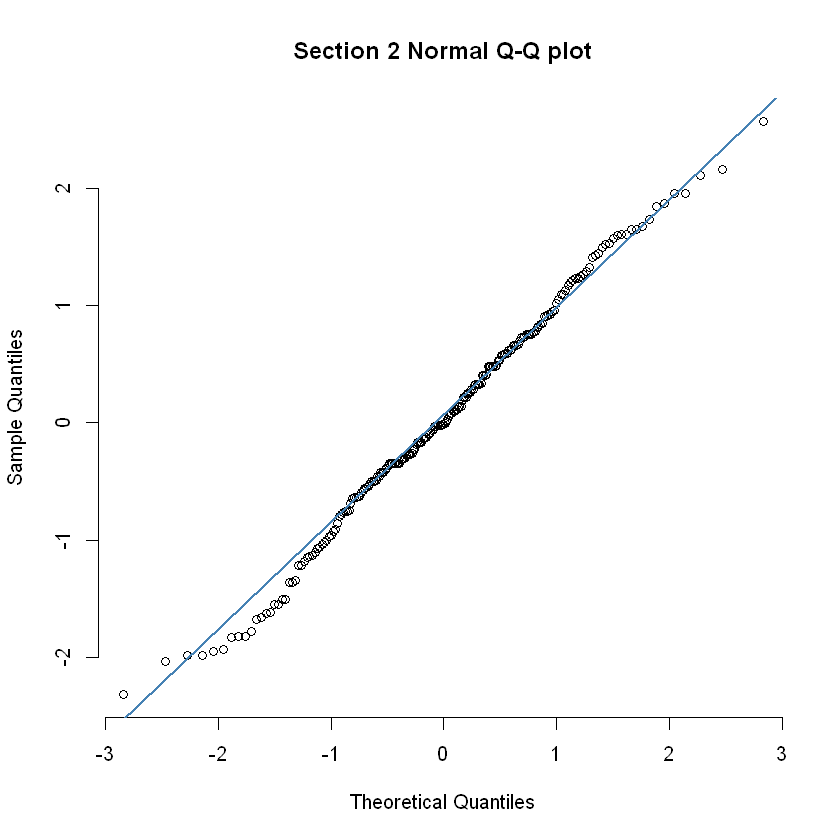

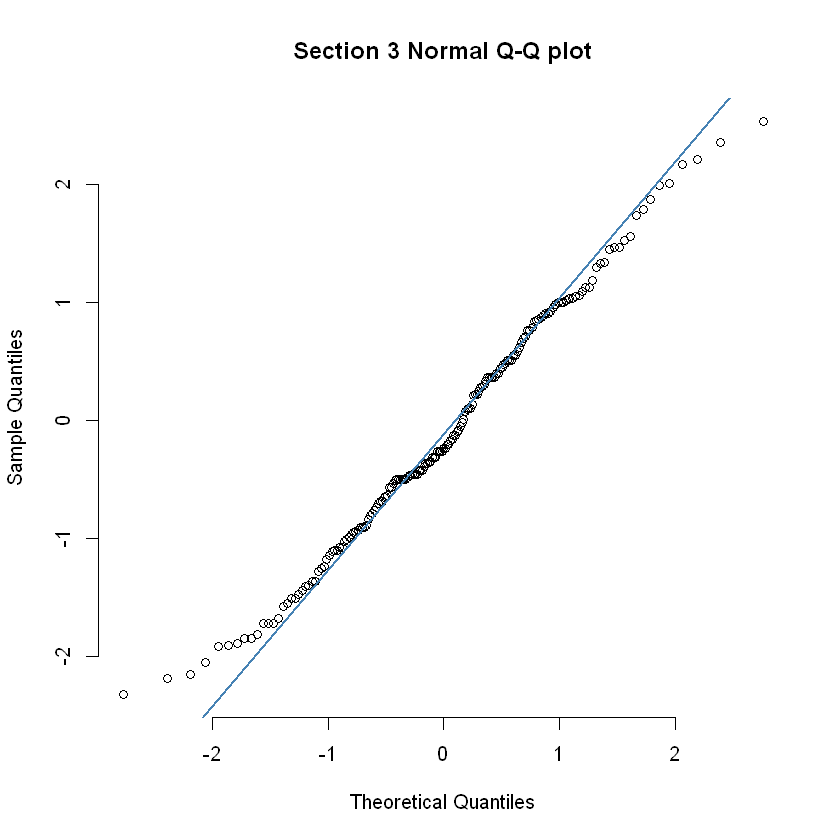

In [23]:
for (i in 1:3){ 
    index = df_trimmed2$Section == i
    scores = df_trimmed2$Score_std[index]
    print(paste("Section", i, "  p =", shapiro.test(scores))[2])
    }

for (i in 1:3){ 
    index = df_trimmed2$Section == i
    scores = df_trimmed2$Score_std[index]
    text <- paste("Section", i, "Normal Q-Q plot")
    qqnorm(scores, main = text, pch = 1, frame = FALSE)
    qqline(scores, col = "steelblue", lwd = 2)
    }


### ANOVA for years 6 - 9
Now running ANOVA reveals no significant difference between any section.

                 Df Sum Sq Mean Sq F value Pr(>F)
factor(Section)   2    2.8  1.4050   1.414  0.244
Residuals       624  620.2  0.9939               

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Score_std ~ factor(Section), data = df_trimmed2)

$`factor(Section)`
             diff        lwr        upr     p adj
2-1 -0.0007784237 -0.2217366 0.22017971 0.9999622
3-1 -0.1491002724 -0.3826282 0.08442769 0.2916302
3-2 -0.1483218487 -0.3855374 0.08889371 0.3066252


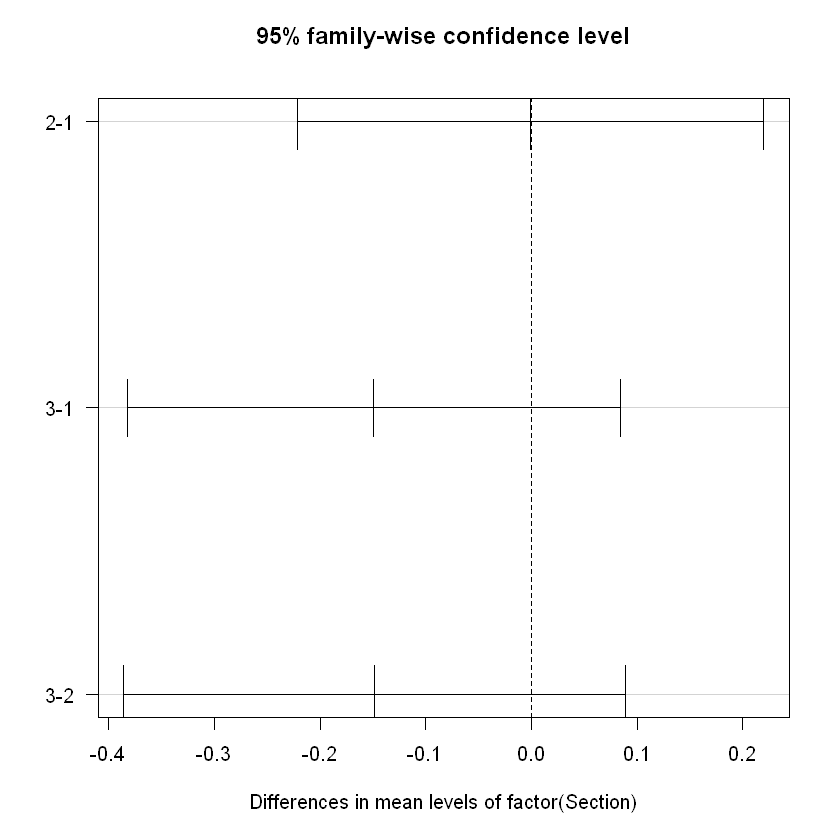

In [24]:
aov_results <- aov(Score_std ~ factor(Section), # need 'factor' here to tell aov that Section is categorical
  data = df_trimmed2
)

summary(aov_results)

TukeyHSD(aov_results, conf.level=.95)

plot(TukeyHSD(aov_results, conf.level=.95), las = 1)

### t-test for section 1 against the rest, years 6 - 9.
Now we will do a 2-sample t-test for section 1 against all other students. Note that the Shapiro-Wilk test does not detect a significant departure from normality for either of these populations.

In [25]:
index <- df_trimmed2$Section == 1
scores_1 <- df_trimmed2$Score_std[index] 
shapiro.test(scores_1)


index <- df_trimmed2$Section == 2 | df_trimmed2$Section == 3
scores_23 <- df_trimmed2$Score_std[index]
shapiro.test(scores_23)

str(scores_1)
str(scores_23)


	Shapiro-Wilk normality test

data:  scores_1
W = 0.99554, p-value = 0.7378



	Shapiro-Wilk normality test

data:  scores_23
W = 0.99396, p-value = 0.1197


 num [1:233] 1.77 1.53 1.49 1.45 1.41 ...
 num [1:394] 1.65 1.61 1.61 1.57 1.53 ...


In [26]:
library(pwr)

effect_sizes = c(0.1,0.2,0.3)
powers = rep(NA, length(effect_sizes))
k = 1
for (d in effect_sizes){   
    h_object <-  pwr.t2n.test(n1 = length(scores_1), 
                     n2 = length(scores_23), 
                     d = d, 
                     sig.level = 0.05, 
                     power = NULL,
                     alternative = "greater")
    powers[k] <- paste("when d =", d, ", power = ", h_object[5], sep = "  ") 
    k = k + 1
}

paste('n1  =', h_object[1], 'n2  =', h_object[2], 'significance level  =', h_object[4], sep = "  ")

powers

[1] "n1  =  233  n2  =  394  significance level  =  0.05"

[1] "when d =  0.1  , power =   0.331366179423766"
[2] "when d =  0.2  , power =   0.780109926588793"
[3] "when d =  0.3  , power =   0.976219583502416"

In [27]:
t.test(x = scores_1, y = scores_23,
       alternative = "greater", paired = FALSE, var.equal = TRUE,
       conf.level = 0.95)


	Two Sample t-test

data:  scores_1 and scores_23
t = 0.81742, df = 625, p-value = 0.207
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -0.06843702         Inf
sample estimates:
  mean of x   mean of y 
 0.04235991 -0.02505041 


<a id='head'></a>
## 7. Head to head of section 2 against section 3, all years except year 6
Now we will compare sections 2 and 3 with classical methods in every year except year 6, when there was no section 3. Since sections 2 and 3 were both randomized during all these years it makes sense to do this. Here the Shapiro-Wilk test sees no departure from normality for the section 2 scores, but does detect a statistically significant departure for section 3. As before, I suspect this will primarily negatively affect the statistical power.

In [28]:
index <- df$Year == 6

df_trimmed3 <- df[!index,]

str(df_trimmed3)

'data.frame':	1456 obs. of  4 variables:
 $ Section  : int  1 2 1 1 1 1 1 1 1 2 ...
 $ Year     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Score    : num  97.8 95.6 95.6 94.4 93.3 ...
 $ Score_std: num  2.07 1.96 1.96 1.91 1.86 ...


In [29]:
index <- df_trimmed3$Section == 2
scores_2 <- df_trimmed3$Score_std[index]
shapiro.test(scores_2)

index <- df_trimmed3$Section == 3
scores_3 <- df_trimmed3$Score_std[index]
shapiro.test(scores_3)

str(scores_2)
str(scores_3)


	Shapiro-Wilk normality test

data:  scores_2
W = 0.99819, p-value = 0.9036



	Shapiro-Wilk normality test

data:  scores_3
W = 0.99298, p-value = 0.02022


 num [1:474] 1.96 1.75 1.54 1.32 1.05 ...
 num [1:496] 1.48 1.21 1.11 1.11 1.11 ...


In [30]:
library(pwr)

effect_sizes = c(0.1,0.2,0.3)
powers = rep(NA, length(effect_sizes))
k = 1
for (d in effect_sizes){   
    h_object <-  pwr.t2n.test(n1 = length(scores_2), 
                     n2 = length(scores_3), 
                     d = d, 
                     sig.level = 0.05, 
                     power = NULL,
                     alternative = "greater")
    powers[k] <- paste("when d =", d, ", power = ", h_object[5], sep = "  ") 
    k = k + 1
}

paste('n1  =', h_object[1], 'n2  =', h_object[2], 'significance level  =', h_object[4], sep = "  ")

powers

[1] "n1  =  474  n2  =  496  significance level  =  0.05"

[1] "when d =  0.1  , power =   0.46450081588444" 
[2] "when d =  0.2  , power =   0.928764441693027"
[3] "when d =  0.3  , power =   0.998746110905561"

In [31]:
t.test(x = scores_2, y = scores_3,
       alternative = "greater", paired = FALSE, var.equal = TRUE,
       conf.level = 0.95)


	Two Sample t-test

data:  scores_2 and scores_3
t = 0.56136, df = 968, p-value = 0.2873
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -0.06516953         Inf
sample estimates:
 mean of x  mean of y 
-0.1850544 -0.2187698 


Again we do not detect any significant difference between the two sections, and as before our power is not high enough that this gives us strong evidence against a small effect either. According to our power analysis, our results do give us good reason to believe there is no effect with $d\geq 0.3$, but we should not take the exact number produced by the power analysis too seriously, due to the departure from normality mentioned above.

### Revisiting the dropping of NAs
In the above analysis, we simply dropped students who did not take the final exam for whatever reason. This may confound the analysis, because students quitting the course are most likely students who are not finding success in it. If there were, hypothetically, many more students in section 3 quitting than in section 2, and we omitted them from the data, this could mask the true effect. In our case, there are not actually many NAs (only 14), so it should not make much difference, but for good practice it would be better to deal with them in a more sophisticated way.

So what exactly should we do? Without going more deeply into each individual student's reason for quitting the course, it seems reasonably safe to assume that most students who quit are academically struggling and on a path to failing. If we want to include them in the data, what score should we assign them? Clearly we should not assign them an average score calculated using their whole section, as this would likely significantly overestimate the score they would have got if they had taken the exam.

We could alternatively calculate an average taken over failing scores, or something like that. However, I have decided to just score them with 0. This likely underestimates their hypothetical exam scores, as even very poorly prepared students can usually (but not always!) scrape a few marks here and there. However, quitting the course altogether is a drastic step, and it seems reasonable to me that this should be reflected in the data somehow. Also, this represents an opposite extreme to dropping the students from the data completely, so if the two approaches yield similar results this should reinforce our confidence in them.

Below we replace NAs with 0, then repeat the rest of the previous data manipulation steps. I will just repeat the analysis of sections 2 against section 3 for years other than 6 here, but we could also do similar for our other tests. 


In [32]:
df_0 <- df_base

# NA <- 0
df_0[is.na(df_0)] <- 0

# drop repeats
df_0 <- df_0[!df_0$Repeat == 1,]

# drop redundant columns
drops <- c("Total","Repeat")
df_0 <- df_0[ , !(names(df_0) %in% drops)]

# standardized scores
for (y in 1 : num_years){
  index <- df_0$Year == y
  m <- mean(df_0$Score[index])
  s <- sd(df_0$Score[index])
  df_0$Score_std[index] <- ( df_0$Score[index] - m )/s
    }

# drop year 6
index <- (df_0$Year == 6)
df_trimmed4 <- df_0[!index, ]

str(df_trimmed4)

'data.frame':	1470 obs. of  4 variables:
 $ Section  : int  1 2 1 1 1 1 1 1 1 2 ...
 $ Year     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Score    : num  97.8 95.6 95.6 94.4 93.3 ...
 $ Score_std: num  2.04 1.93 1.93 1.88 1.83 ...


In [33]:
index <- df_trimmed4$Section == 2
scores_2 <- df_trimmed4$Score_std[index]
shapiro.test(scores_2)

index <- df_trimmed4$Section == 3
scores_3 <- df_trimmed4$Score_std[index] 
shapiro.test(scores_3)


	Shapiro-Wilk normality test

data:  scores_2
W = 0.99812, p-value = 0.8787



	Shapiro-Wilk normality test

data:  scores_3
W = 0.99424, p-value = 0.05623


In [34]:
m_2 = mean(scores_2)
m_3 = mean(scores_3)

paste("mean_2:", m_2, sep = " ")
paste("mean_3:", m_3, sep = " ")

[1] "mean_2: -0.20178908160182"

[1] "mean_3: -0.203223636497073"

In [35]:
effect_sizes = c(0.1,0.2,0.3)
powers = rep(NA, length(effect_sizes))
k = 1
for (d in effect_sizes){   
    h_object <-  pwr.t2n.test(n1 = length(scores_2), 
                     n2 = length(scores_3), 
                     d = d, 
                     sig.level = 0.05, 
                     power = NULL,
                     alternative = "greater")
    powers[k] <- paste("when d =", d, " power =", h_object[5], sep = " ") 
    k = k + 1
}

paste('n1  =', h_object[1], 'n2  =', h_object[2], 'significance level  =', h_object[4], sep = "  ")

powers

[1] "n1  =  483  n2  =  499  significance level  =  0.05"

[1] "when d = 0.1  power = 0.468397377759018"
[2] "when d = 0.2  power = 0.931394099984644"
[3] "when d = 0.3  power = 0.998862659369958"

In [36]:
t.test(x = scores_2, y = scores_3,
       alternative = "greater", paired = FALSE, var.equal = TRUE,
       conf.level = 0.95)


	Two Sample t-test

data:  scores_2 and scores_3
t = 0.023899, df = 980, p-value = 0.4905
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -0.09739116         Inf
sample estimates:
 mean of x  mean of y 
-0.2017891 -0.2032236 


As before, the low power of the test for d = 0.1 means we cannot use this as evidence that there is no small effect, but our null result does provide some evidence against larger effect sizes.

<a id='digr'></a>
## 8. Digression: Examining online vs onsite
While we are here, our data gives us an opportunity to ask an interesting question. The last 3 years the students took the exam, it was computer based. Actually the basic exam was the same with minor variations each time (there was significant randomization with questions as an attempt to ward off cheating). In years 7 and 8 the exam was taken with students at home, proctored via Webex, while in year 9 the students took the exam in a lab with in-person proctors. Did the difference in exam conditions significantly affect performance?

In [37]:
df_2 <- df_base[ complete.cases(df_base$Score) , ]

for (y in 1 : num_years){
  index <- df_2$Year == y
  m <- mean(df_2$Score[index])
  s <- sd(df_2$Score[index])
  df_2$Score_std[index] <- ( df$Score[index] - m )/s
    }

str(df_2)

index <- df_2$Year == 7 | df_2$Year == 8
df_online <- df_2[index,]

index <- df_2$Year == 9
df_onsite <- df_2[index,]

str(df_online)
str(df_onsite)

'data.frame':	1613 obs. of  6 variables:
 $ Section  : int  1 2 1 1 1 1 1 1 1 2 ...
 $ Total    : chr  "97.78" "95.56" "95.56" "94.44" ...
 $ Year     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Repeat   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Score    : num  97.8 95.6 95.6 94.4 93.3 ...
 $ Score_std: num  2.07 1.96 1.96 1.91 1.86 ...
'data.frame':	344 obs. of  6 variables:
 $ Section  : int  3 3 1 3 1 3 2 2 1 2 ...
 $ Total    : chr  "94.29" "91.43" "90.71" "90.71" ...
 $ Year     : int  7 7 7 7 7 7 7 7 7 7 ...
 $ Repeat   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Score    : num  94.3 91.4 90.7 90.7 87.1 ...
 $ Score_std: num  1.001 0.966 0.93 0.93 0.93 ...
'data.frame':	184 obs. of  6 variables:
 $ Section  : int  3 2 3 2 1 3 1 1 1 1 ...
 $ Total    : chr  "61.43" "45" "35.71" "37.86" ...
 $ Year     : int  9 9 9 9 9 9 9 9 9 9 ...
 $ Repeat   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Score    : num  61.4 45 35.7 37.9 10 ...
 $ Score_std: num  -0.9364 -0.3506 1.0038 -0.3875 0.0521 ...


In [38]:
scores_online <- df_online$Score_std
shapiro.test(scores_online)
scores_onsite <- df_onsite$Score_std
shapiro.test(scores_onsite)

t.test(x = scores_online, y = scores_onsite,
       alternative = "two.sided", paired = FALSE, var.equal = TRUE,
       conf.level = 0.95)


	Shapiro-Wilk normality test

data:  scores_online
W = 0.99314, p-value = 0.1183



	Shapiro-Wilk normality test

data:  scores_onsite
W = 0.9867, p-value = 0.189



	Two Sample t-test

data:  scores_online and scores_onsite
t = -1.506, df = 484, p-value = 0.1327
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.32542161  0.04302378
sample estimates:
  mean of x   mean of y 
-0.08954027  0.05165865 


In [39]:
effect_sizes = c(0.1,0.2,0.3,0.4,0.5)
powers = rep(NA, length(effect_sizes))
k = 1
for (d in effect_sizes){   
    h_object <-  pwr.t2n.test(n1 = length(scores_online), 
                     n2 = length(scores_onsite), 
                     d = d, 
                     sig.level = 0.05, 
                     power = NULL,
                     alternative = "two.sided")
    powers[k] <- paste("when d =", d, ", power = ", h_object[5], sep = "  ") 
    k = k + 1
}

paste('n1  =', h_object[1], 'n2  =', h_object[2], 'significance level  =', h_object[4], sep = "  ")

powers

[1] "n1  =  344  n2  =  184  significance level  =  0.05"

[1] "when d =  0.1  , power =   0.194085030767687"
[2] "when d =  0.2  , power =   0.589346276575281"
[3] "when d =  0.3  , power =   0.906366726098518"
[4] "when d =  0.4  , power =   0.992058508546005"
[5] "when d =  0.5  , power =   0.999771246565992"

From the analysis above we see that while average performance decreased for the onsite exam, it did not decrease by enough to be statistically significant (using the traditional threshold of 0.05). The power analysis indicates that our sample sizes are not large enough for us to be confident of detecting small effects, but we can be reasonably confident that we have not missed an effect of d = 0.4 or greater. 

<a id='bayes'></a>
## 9. A Bayesian approach
Rather than split our data into subsets to work around the fact that section 1 students were randomized during years 1-5, with a Bayesian approach we can easily use the whole dataset in one pass.

For our model we will incorporate information about academic streaming as an ordered categorical variable. This is modeled as a variable with 3 levels. Level 3 indicates that students have been academically selected. This applies to section 1 students in years 1-5. Level 1 indicates that students were subject to academic selection but were not assigned to section 1. This is for students in years 1-5 not in section 1. Finally, level 2 is for everyone else. I.e. students for years 6-8, as these students were not subject to streaming at all. 

We will also include section as an ordered categorical variable. The background assumption here is that section affects performance in an ordered fashion. I.e. the effect of being in section 2 lies between the effect of being in section 1 or 3. We make no assumption about the size or direction of the effect. It could be positive, negative or zero.

The variables here are ordered categorical, which allows the effect of e.g. the difference between section 1 and section 2 to be different from the difference between section 2 and section 3.

### Preparing the data for the Bayesian model

In [40]:
df_full <- df

df_full$Stream_level <- ifelse(df_full$Section == 1 & df_full$Year < 6, 3., ifelse(df_full$Year < 6, 1., 2. ))

drops <- c("Year","Score")
df_full <- df_full[ , !(names(df) %in% drops)]

str(df_full)

'data.frame':	1571 obs. of  3 variables:
 $ Section     : int  1 2 1 1 1 1 1 1 1 2 ...
 $ Score_std   : num  2.07 1.96 1.96 1.91 1.86 ...
 $ Stream_level: num  3 1 3 3 3 3 3 3 3 1 ...


### The associated DAG
We can construct the DAG for our simple model and analyze the adjustment set and implied conditional independences, just to check that what we are doing makes sense. Or rather, that it doesn't fail to make sense in an easily detectable way.

Here $A$ stands for 'Academic Streaming', $S$ stands for 'Section' and $E$ stands for 'Exam Score'. 

In [41]:
library(dagitty)
dag <- dagitty( "dag {
A -> S -> E
A -> E
}")

adjustmentSets( dag , exposure="S" , outcome="E" )
impliedConditionalIndependencies(dag)

{ A }

The adjustment set is $\{A\}$, which is good as were will condition on $A$. There are no implied conditional independences, and we can check that our data reflects this.

In [42]:
cor(df_full)

,Section,Score_std,Stream_level
Section,1.0000000,-0.2346191,-0.6729518
Score_std,-0.2346191,1.0000000,0.3086044
Stream_level,-0.6729518,0.3086044,1.0000000


### The first model
Now we can run our first model. Mathematically, it is as follows:

#### Model

$ E \sim Normal(\phi, \sigma)$

$\phi = \alpha + \beta_A\sum_{i=1}^{N_A-1} \delta_i^A + \beta_S \sum_{j=i}^{N_S-1} \delta_j^B$

Here $N_A$ is the academic streaming value, and $N_S$ is the section value, and we have $\sum_{i=1}^{2} \delta_i^A = \sum_{j=i}^{2} \delta_j^B = 1$. So the parameters $\beta_A$ and $\beta_S$ control the maximum possible effect of academic selection and section, respectively, while the individual $\delta$ values break this contribution down into pieces. E.g. A student with academic selection value of 3 gets the full value of $\beta_A$, while one with an academic selection value of 2 gets only $\delta_1^A\beta_A$, which is smaller, and a student with an academic selection value of 1 gets no contribution at all. 

#### Priors

Our priors are weakly informative. In other words, we do not want to constrain the model, but we do want to make use of some background information. For example, it is implausible that e.g. section numbering could have an effect of multiple standard deviations. Similarly, we know the standard deviation of our standardized scores is around 1, because we standardized the scores! So we know $\sigma$ will not deviate too far from 1.  

$\alpha, \beta_A, \beta_S \sim Normal(0,1)$

$(\delta^A_1, \delta^A_2), (\delta^S_1, \delta^S_2) \sim Dirichlet(2,2)$

$\sigma \sim LogNormal(0,0.25)$



In [43]:
dat <- list(
    A = df_full$Stream_level,
    S = df_full$Section,
    E = df_full$Score_std,
    alpha1 = rep( 2 , 2 ),
    alpha2 = rep( 2 , 2 ))

str(dat)

List of 5
 $ A     : num [1:1571] 3 1 3 3 3 3 3 3 3 1 ...
 $ S     : int [1:1571] 1 2 1 1 1 1 1 1 1 2 ...
 $ E     : num [1:1571] 2.07 1.96 1.96 1.91 1.86 ...
 $ alpha1: num [1:2] 2 2
 $ alpha2: num [1:2] 2 2


In [44]:
library(rstan)
code_1 <- 'data{
    vector[1571] E;
    int S[1571];
    int A[1571];
    vector[2] alpha;
}
parameters{
    real sigma;
    real bS;
    real bA;
    real a;
    simplex[2] deltaA;
    simplex[2] deltaS;
}

transformed parameters{
vector[3] deltaA_j;
vector[3] deltaS_j;
deltaS_j = append_row(0, deltaS);
deltaA_j = append_row(0, deltaA);
}

model{
    vector[1571] phi;
    deltaS ~ dirichlet( alpha );
    deltaA ~ dirichlet( alpha );
    a ~ normal( 0 , 1 );
    bA ~ normal( 0 , 1 );
    bS ~ normal( 0 , 1 );
    sigma ~ lognormal( 0, 0.25 );
    for ( i in 1:1571 ) {
        phi[i] = a + bA * sum(deltaA_j[1:A[i]]) + bS * sum(deltaS_j[1:S[i]]);
    }
    E ~ normal( phi , sigma );
}
generated quantities{
  vector[1571] log_lik;
  
  for (i in 1:1571) log_lik[i] = normal_lpdf(E[i] | a + bA * sum(deltaA_j[1:A[i]]) 
                                             + bS * sum(deltaS_j[1:S[i]]), sigma);
}
'

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.21.3, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

Do not specify '-march=native' in 'LOCAL_CPPFLAGS' or a Makevars file



In [45]:
# Trying to run the stan mode breaks the Jupyter kernel on my machien for some reason, but running in rstudio is fine.
# I've included a save of a model run in rstudio.

model_1 <- readRDS("model_1.rds")

# model_1 <- stan( model_code = code_1 , data = dat , chains=4)

The trace plots look ok, as we see below.

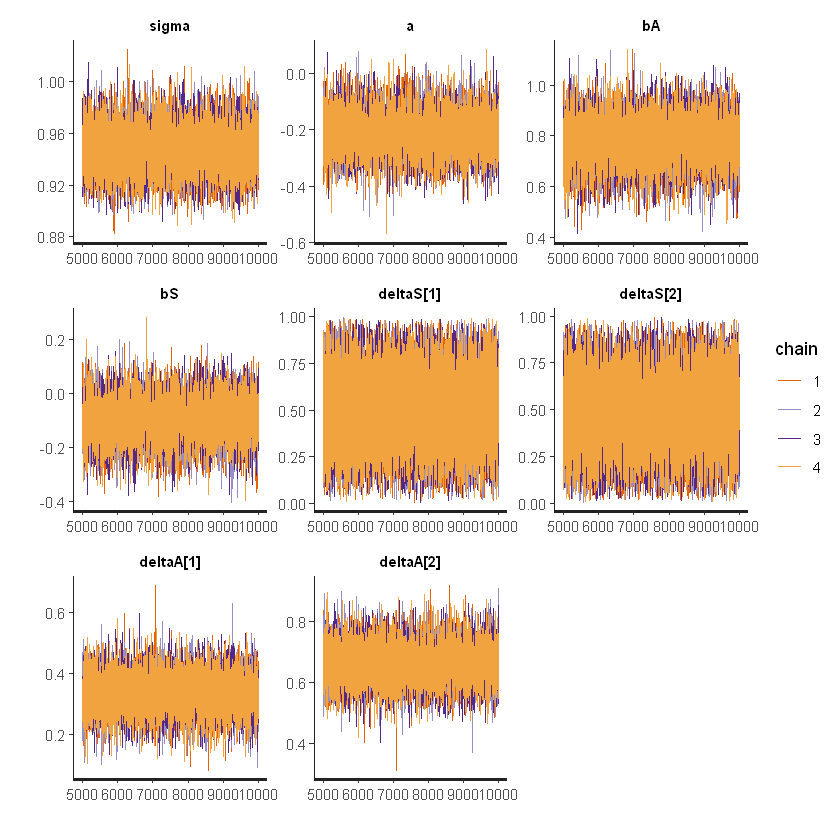

In [46]:
pars = c('sigma', 'a', 'bA', 'bS', 'deltaS', 'deltaA')

stan_trace(model_1, pars = pars)

Now to view the results.

In [47]:
results_1 <- summary(model_1, pars = pars, 
                     probs = c(0.025, 0.975))$summary
results_1

,mean,se_mean,sd,2.5%,97.5%,n_eff,Rhat
sigma,0.94763062,0.0001275056,0.01729156,0.9145772,0.98248758,18391.184,1.000052
a,-0.21346058,0.0007950964,0.07325134,-0.3508415,-0.06411276,8487.730,1.000982
bA,0.77925053,0.0009513251,0.09073793,0.5974136,0.95349139,9097.453,1.000909
bS,-0.09597519,0.0008024663,0.07886895,-0.2535350,0.05469239,9659.586,1.000803
deltaS[1],0.51697525,0.0015815237,0.21004702,0.1192858,0.89893423,17639.312,1.000115
deltaS[2],0.48302475,0.0015815237,0.21004702,0.1010658,0.88071422,17639.312,1.000115
deltaA[1],0.33461851,0.0004700955,0.06241418,0.2103781,0.45592106,17627.647,1.000105
deltaA[2],0.66538149,0.0004700955,0.06241418,0.5440789,0.78962186,17627.647,1.000105


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



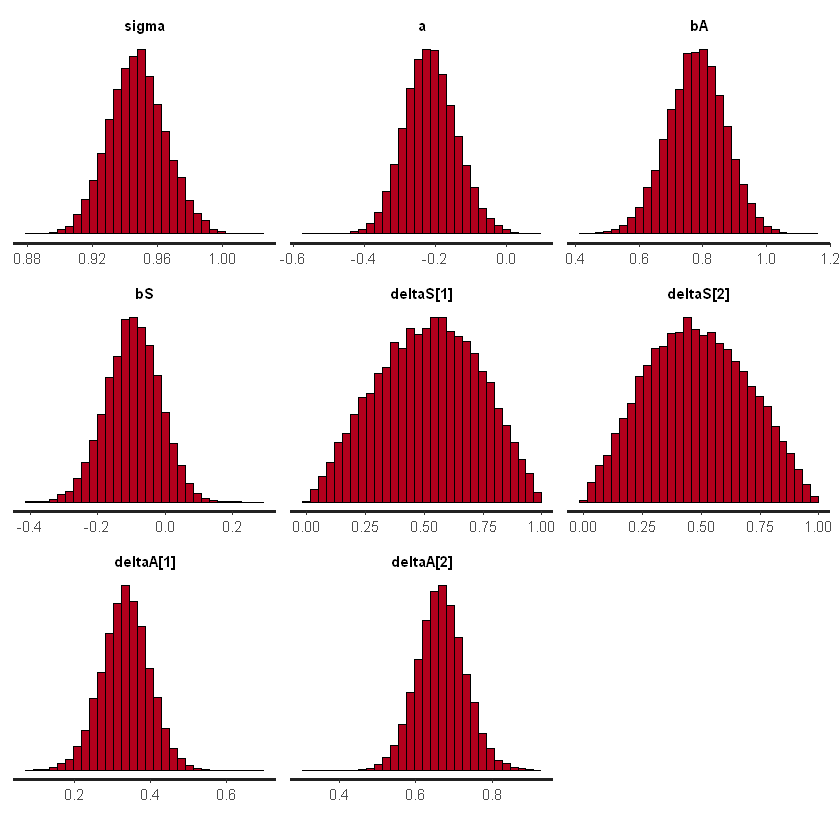

In [48]:
stan_hist(model_1, pars = pars)

As we might expect, our model is confident of a reasonably strong positive effect from academic selection. Moreover, it is quite confident that most of this effect comes from being positively selected (the transition from level 2 to level 3, corresponding to $\delta^A_2$). The model is also reasonably confident of a separate (very) small negative effect for section. I.e. as section increases expected score gets slightly worse, though not confident enough that the 95% credible interval excludes 0. The model is also not very sure at all about the relative sizes of the individual $\delta^S$ values.

Further examining the model's $\beta_S$ values, we see below that around 72% of the time the model samples a value for $\beta_S$ less than -0.05. On the other hand around 86% of the samples were below -0.01. This is reasonable confidence of an effect (though not reaching the legendary 95% associated with classical statistical significance). However, it's worth pointing out that an effect magnitude of 0.05 is quite small in this context, representing 5% of a standard deviation, or roughly 1 mark. 

In [49]:
samples <- extract(model_1, 'bS') 
counts <- ifelse(samples$bS < -0.05, 1, 0)
p <- sum(counts)/length(counts)
paste("Proportion less than -0.05:", p, sep = " ")

samples <- extract(model_1, 'bS') 
counts <- ifelse(samples$bS < -0.01, 1, 0)
p <- sum(counts)/length(counts)
paste("Proportion less than -0.01:", p, sep = " ")

[1] "Proportion less than -0.05: 0.7171"

[1] "Proportion less than -0.01: 0.86395"

### The second model
This second model is simpler. We obtain it from the first by just omitting section information. In other words, we are examining only the effect of academic selection.

In [50]:
code_2 <- 'data{
    vector[1571] E;
    int A[1571];
    vector[2] alpha;
}
parameters{
    real sigma;
    real bA;
    real a;
    simplex[2] deltaA;
}

transformed parameters{
vector[3] deltaA_j;
deltaA_j = append_row(0, deltaA);
}

model{
    vector[1571] phi;
    deltaA ~ dirichlet( alpha );
    a ~ normal( 0 , 1 );
    bA ~ normal( 0 , 1 );
    sigma ~ exponential( 1 );
    for ( i in 1:1571 ) {
        phi[i] = a + bA * sum(deltaA_j[1:A[i]]);
    }
    E ~ normal( phi , sigma );
}
generated quantities{
  vector[1571] log_lik;
  
  for (i in 1:1571) log_lik[i] = normal_lpdf(E[i] | a + bA * sum(deltaA_j[1:A[i]]), sigma);
}
'

In [51]:
#model_2 <- stan( model_code = code_2 , data = dat , chains=4, cores = 4, iter = 10000 )

model_2 <- readRDS("model_2.rds")

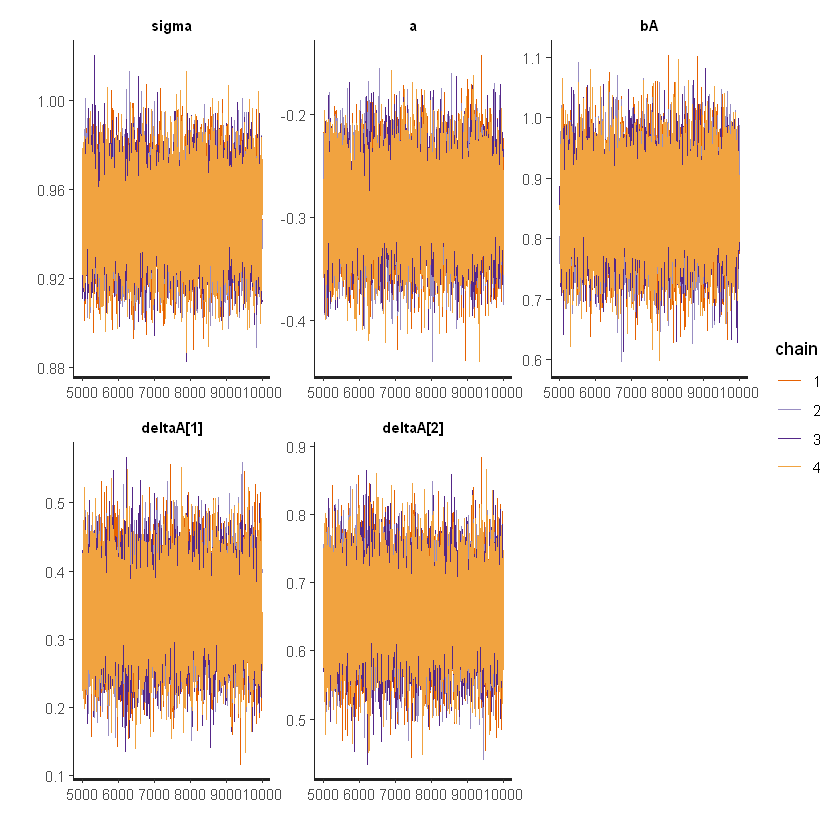

In [52]:
pars = c('sigma', 'a', 'bA', 'deltaA')

stan_trace(model_2, pars = pars)

In [53]:
results_2 <- summary(model_2, pars = pars, 
                     probs = c(0.025, 0.975))$summary
results_2

,mean,se_mean,sd,2.5%,97.5%,n_eff,Rhat
sigma,0.9475344,0.0001283290,0.01701817,0.9146665,0.9814286,17586.35,0.9999440
a,-0.2872898,0.0003559082,0.03731948,-0.3610662,-0.2155796,10995.00,0.9999388
bA,0.8528010,0.0005640629,0.06518889,0.7253884,0.9801194,13356.48,0.9999726
deltaA[1],0.3397637,0.0004932077,0.05623965,0.2292360,0.4517388,13002.46,1.0003054
deltaA[2],0.6602363,0.0004932077,0.05623965,0.5482612,0.7707640,13002.46,1.0003054


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



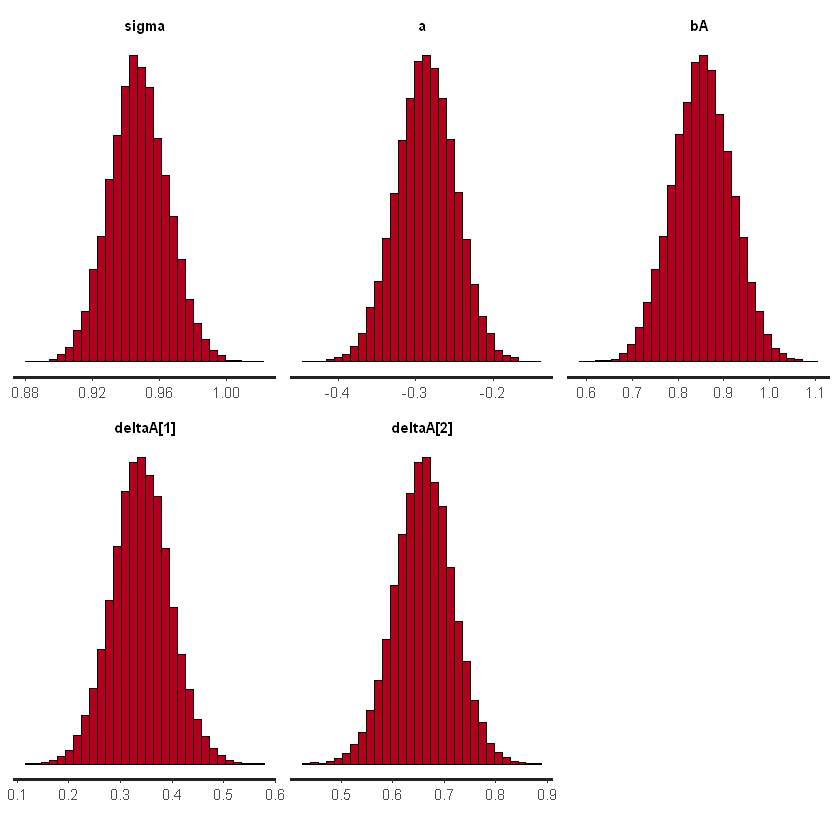

In [54]:
stan_hist(model_2, pars = pars)

### Comparing the models
As we see below, the PSIS approximations of leave-one-out cross-validation (provided by the loo package) show a very small preference for the second model. In other words, the analysis expects the model with section information to generalize slightly better. This is another reason for skepticism towards the idea that section number plays a significant role in determining exam performance.

In [55]:
library(loo)

loo_1 <- loo(model_1)
loo_2 <- loo(model_2)


comp <- loo_compare(loo_1, loo_2)
print(comp, simplify=FALSE)

This is loo version 2.5.1

- Online documentation and vignettes at mc-stan.org/loo

- As of v2.0.0 loo defaults to 1 core but we recommend using as many as possible. Use the 'cores' argument or set options(mc.cores = NUM_CORES) for an entire session. 

- Windows 10 users: loo may be very slow if 'mc.cores' is set in your .Rprofile file (see https://github.com/stan-dev/loo/issues/94).


Attaching package: 'loo'


The following object is masked from 'package:rstan':

    loo




       elpd_diff se_diff elpd_loo se_elpd_loo p_loo   se_p_loo looic   se_looic
model2     0.0       0.0 -2145.9     25.3         3.8     0.2   4291.7    50.5 
model1    -0.5       1.2 -2146.3     25.3         5.0     0.2   4292.7    50.5 


<a id='conc'></a>
## 10. Conclusions
None of our tests produced a statistically significant effect (as classically understood) for section numbering on academic performance, after accounting for academic selection. In addition, PSIS on the two Bayesian models showed a slight preference for the model that did not include section numbering as an explanatory variable. Moreover, in our classical tests the power analyses revealed that we would be very likely to detect effects with $d\geq 0.3$ during random testing, so we can be reasonably confident that we did not miss anything other than a small (in terms of $d$ value) effect.

On the other hand, the Bayesian model that included section numbering was fairly confident that section numbering had a small effect (recall that roughly 71% of the time the sampled value of $\beta_S$ was less than -0.05), and the PSIS preference for the other model was hardly decisive. An effect of size 0.05 translates to around 1 mark on the outcome scale, so the model is leaning towards the idea that being in section 1 rather than section 3 is worth at least one extra mark come exam time (though no more than around 8 marks as $\beta_S$ values of less than 0.4 are very rare in the model). This does not sound like a lot, but it can be extremely significant to students when 1 point on the exam may represent transition to a different letter grade.  

In situations like this we should consider the relative costs of making an error (type 1 or type 2) before deciding how to act. This is something that traditional significance testing with its 5% threshold does not take into account. Here, the cost of acting on a type 1 error (i.e. believing section numbering makes a difference when actually it does not) is that sections are renamed into something without an implicit ordering. This may involve some irritation for administrators, but it seems unlikely to cause problems beyond that. On the other hand, the cost of a type 2 error here (i.e. believing section numbering makes no difference when actually it does) is students in section 1 getting (on average) a handful of extra marks on their exams relative to section 3 students. Note that this is not to say that the section 1 students would not deserve the extra marks based on their exam performances. In other words, come exam time they would have earned those marks through better exam performance. Rather I mean that being in section 1 would have given them an unearned advantage during the learning process that manifested as a higher exam score. This to me seems like a more significant problem. 

Since our first model leans in this direction, in lieu of further research it could be a good idea to rethink the numerical section numbering in the faculty, and avoid it elsewhere. This is not to say that we should be confident that numerical section numbering makes a small difference (and we can be highly confident that it doesn't make a big difference), just that there seems to me to be enough evidence to make making a change worth the small amount of effort. The issues associated with error in this direction seem to me to be minimal.

Of course, further analysis using data for more exams and/or more students would provide useful information that could settle the question more decisively. 